In [42]:
import librosa
import sklearn
import torch
import numpy as np

In [ ]:
audio_path = '/home/stanislaw/Downloads/DeathGrips-GetGot.mp3'
x , sr = librosa.load(audio_path)
print(type(x), type(sr))
print(x.shape, sr)

In [53]:
print(x[100000])
print(x.shape)

0.020779422
(3792384,)


In [38]:
def get_netG(model_path):
    
    from models import Generator
    
    device = torch.device("cuda:0" if (torch.cuda.is_available()) else "cpu")

    # Load Model
    checkpoint = torch.load("".join([model_path, ".pt"]), map_location=device)
    nz = checkpoint["latent_vector_size"]
    ngf = checkpoint["feature_maps_size"]
    nc = checkpoint["channels_num"]
    netG_params = {
        "latent_vector_size": nz,
        "feature_maps_size": ngf,
        "channels_num": nc
    }
    # Crate and load generator
    netG = Generator(**netG_params).to(device)
    netG.load_state_dict(checkpoint["netG_state_dict"])
    print(netG)
    netG.eval()
    
    return netG

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(1, 100, 1, 1)
-0.06803345
Generator(
  (main): Sequential(
    (0): ConvTranspose2d(100, 512, kernel_size=(4, 4), stride=(1, 1), bias=False)
    (1): BatchNorm2d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): ConvTranspose2d(512, 256, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
    (4): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (5): ReLU(inplace=True)
    (6): ConvTranspose2d(256, 128, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
    (7): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (8): ReLU(inplace=True)
    (9): ConvTranspose2d(128, 64, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
    (10): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (11): ReLU(inplace=True)
    (12): ConvTranspose2d(64, 3, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=Fal

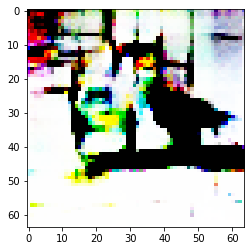

In [68]:
nz = 100

# latent_code = torch.randn(1, nz, 1, 1)
# features = x[10000:10100].reshape(1, -1, 1, 1)
print(features.shape)
idxs = np.random.randint(low=0, high=3792384, size=100)
features = x[idxs].reshape(1,-1,1,1) * 100
print(features.mean())
latent_code = torch.from_numpy(features)

model_path = "./models/first_model_299"
netG = get_netG(model_path)

img = netG(latent_code).detach().numpy().squeeze()

plt.imshow(np.transpose(img, (1,2,0)))

In [8]:
import IPython.display as ipd
ipd.Audio(audio_path)

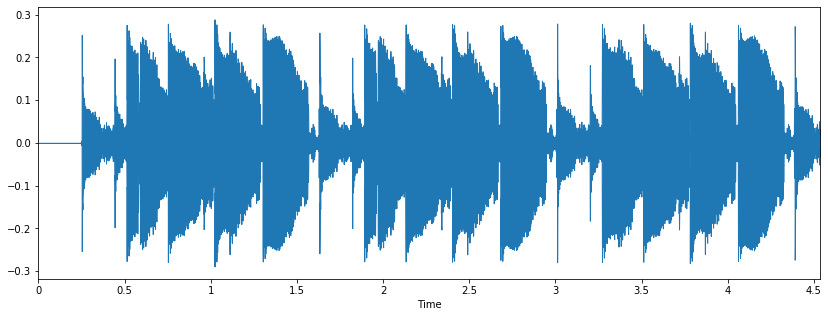

In [12]:
%matplotlib inline
import matplotlib.pyplot as plt
import librosa.display
plt.figure(figsize=(14, 5))
librosa.display.waveplot(x[:100000], sr=sr)

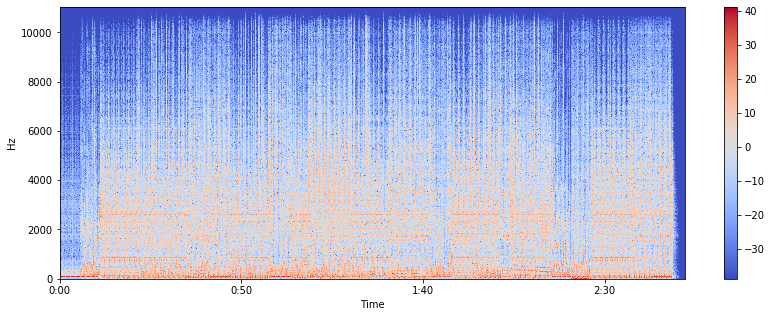

In [13]:
X = librosa.stft(x)
Xdb = librosa.amplitude_to_db(abs(X))
plt.figure(figsize=(14, 5))
librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='hz')
plt.colorbar()

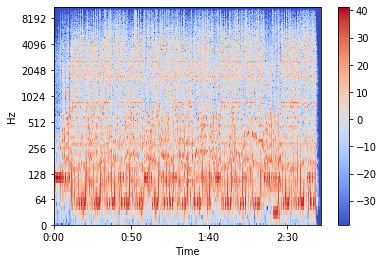

In [14]:
librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='log')
plt.colorbar()

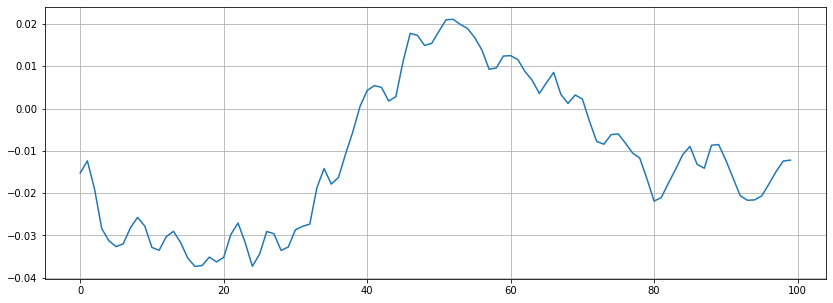

In [16]:
# Zooming in
n0 = 9000
n1 = 9100
plt.figure(figsize=(14, 5))
plt.plot(x[n0:n1])
plt.grid()

In [17]:
zero_crossings = librosa.zero_crossings(x[n0:n1], pad=False)
print(sum(zero_crossings))

2


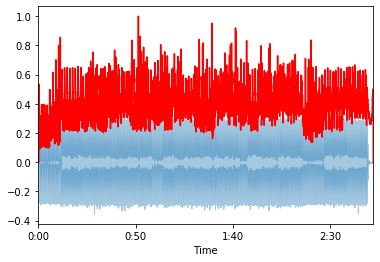

In [21]:
spectral_centroids = librosa.feature.spectral_centroid(x, sr=sr)[0]
spectral_centroids.shape
(775,)
# Computing the time variable for visualization
frames = range(len(spectral_centroids))
t = librosa.frames_to_time(frames)
# Normalising the spectral centroid for visualisation
def normalize(x, axis=0):
    return sklearn.preprocessing.minmax_scale(x, axis=axis)
#Plotting the Spectral Centroid along the waveform
librosa.display.waveplot(x, sr=sr, alpha=0.4)
plt.plot(t, normalize(spectral_centroids), color='r')

(20, 7408)


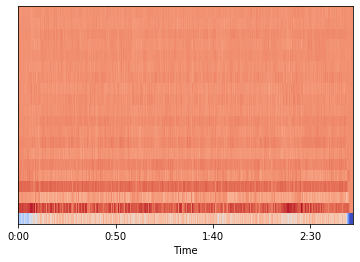

In [25]:
mfccs = librosa.feature.mfcc(x, sr=sr)
print(mfccs.shape)
#Displaying  the MFCCs:
librosa.display.specshow(mfccs, sr=sr, x_axis='time')

[-6.2823041e-08  1.4933345e-08  1.0974722e-08 -1.3259781e-08
 -8.6695469e-09  1.2101159e-08 -1.5303460e-08  1.4579322e-08
 -1.5504609e-08 -2.3011513e-08  2.1048292e-08 -6.1310392e-09
  5.1655213e-09  2.3985077e-08 -2.0300016e-08 -1.4756334e-08
  1.6896565e-09 -3.4951753e-08  7.8689721e-09 -1.9825302e-08]
[1.0000007  0.9999985  1.0000006  0.99999964 1.0000029  1.0000014
 1.0000008  0.99999946 0.9999986  1.0000008  1.0000004  0.99999934
 0.9999994  0.99999994 1.0000001  0.9999988  0.9999987  1.
 0.999998   1.0000002 ]


/home/stanislaw/anaconda3/envs/pytorch/lib/python3.7/site-packages/sklearn/preprocessing/_data.py:173: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "
/home/stanislaw/anaconda3/envs/pytorch/lib/python3.7/site-packages/sklearn/preprocessing/_data.py:190: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn("Numerical issues were encountered "


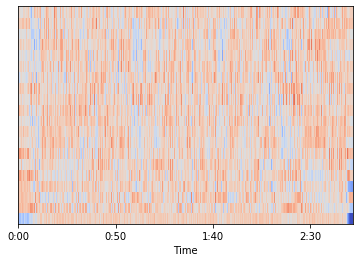

In [26]:
mfccs = sklearn.preprocessing.scale(mfccs, axis=1)
print(mfccs.mean(axis=1))
print(mfccs.var(axis=1))
librosa.display.specshow(mfccs, sr=sr, x_axis='time')

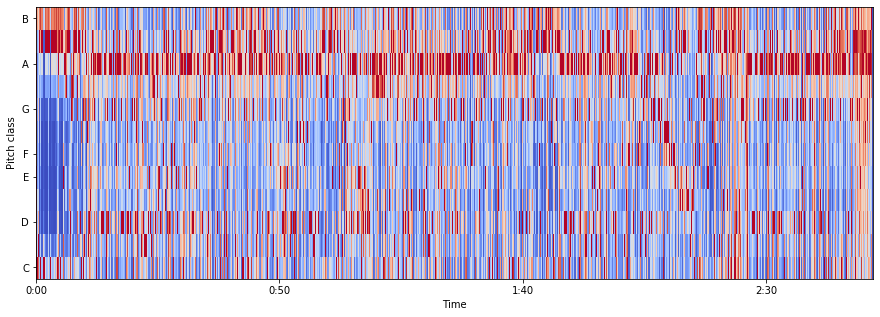

In [27]:
hop_length = 512
chromagram = librosa.feature.chroma_stft(x, sr=sr, hop_length=hop_length)
plt.figure(figsize=(15, 5))
librosa.display.specshow(chromagram, x_axis='time', y_axis='chroma', hop_length=hop_length, cmap='coolwarm')